<a href="https://colab.research.google.com/github/sarathb818/Cotton-Leaf-Disease-prediction-using-the-transfer-learning-techniques/blob/main/Transfer_Learning_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To prevent the gpu from overclocking
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # This allows only 50 % usage of the GPU.
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#importing the libraries

from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/My Drive/data/train'
valid_path = '/content/drive/My Drive/Test'

In [ ]:
#import the Resnet50 library and the add preprocessing layer to the front Resnet
# Here we are using the pretrained weights from the imagenet bcz it has huge of catgories with image
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top = False)
# Since we want to remove the top layer as our image_size we will make the include_top = False

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
# Since we dont want to train the weights bcz we are taking it from the weights of Resnet50
for layers in resnet.layers:
  layer_trainable = False

In [ ]:
#for getting number of output classes
folders = glob('/content/drive/My Drive/data/train/*')

In [ ]:
# Flattening because we add the last number of layers based on the categories of the image
x = Flatten()(resnet.output)

In [ ]:
len(folders)

4

In [ ]:
prediction = Dense(len(folders),activation = 'softmax')(x) # This is get the output nodes
# Softmax is used since we have n number of categories

# Create a model 

model = Model(inputs=resnet.input,outputs = prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# cost and the optimization method used
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

In [ ]:
# The ImageDataGenerator is to import the images from the dataset
# The Dataaugmentation for the train data set

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
!nvidia-smi

Mon Oct  5 05:41:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    32W / 250W |    615MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Test',
                                        target_size = (224,224),
                                        batch_size = 16,
                                        class_mode = 'categorical')



Found 18 images belonging to 4 classes.


In [ ]:
#fitting the model

r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs =20,
    steps_per_epoch =len(training_set),
    validation_steps =len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
122/122 [==============================] - 1473s 12s/step - loss: 3.6524 - accuracy: 0.5859 - val_loss: 116.6285 - val_accuracy: 0.1667
Epoch 2/20
122/122 [==============================] - 42s 343ms/step - loss: 0.7283 - accuracy: 0.7514 - val_loss: 7.6148 - val_accuracy: 0.2778
Epoch 3/20
122/122 [==============================] - 42s 344ms/step - loss: 0.4298 - accuracy: 0.8580 - val_loss: 4.4671 - val_accuracy: 0.2778
Epoch 4/20
122/122 [==============================] - 42s 342ms/step - loss: 0.3025 - accuracy: 0.8995 - val_loss: 8.5053 - val_accuracy: 0.2778
Epoch 5/20
122/122 [==============================] - 42s 341ms/step - loss: 0.2358 - accuracy: 0.9129 - val_loss: 7.5041 - val_accuracy: 0.2778
Epoch 6/20
122/122 [==============================] - 42s 347ms/step - loss: 0.1872 - accuracy: 0.9441 - val_loss: 11.5669 - val_accuracy: 0.2778
Epoch 7/20
122/122 [==============================]

In [ ]:
import matplotlib.pyplot as plt

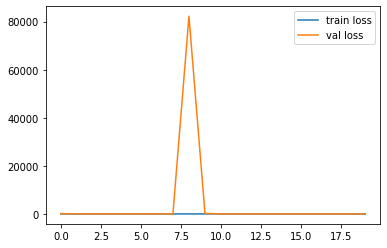

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


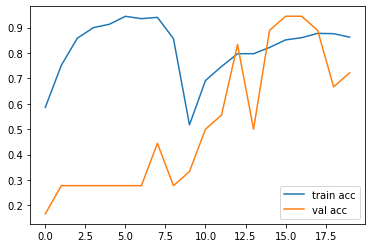

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.9998617e-01, 6.0388737e-07, 1.3181419e-05, 1.4095196e-13],
       [9.9999964e-01, 1.1546862e-08, 3.1520560e-07, 2.1745417e-13],
       [1.6535843e-05, 1.6698113e-01, 8.3225799e-01, 7.4438268e-04],
       [3.9642028e-04, 7.9347089e-02, 9.1946751e-01, 7.8898779e-04],
       [9.3117970e-01, 3.4026266e-03, 6.5417640e-02, 6.5735771e-11],
       [1.4861294e-05, 7.7730119e-02, 9.2168814e-01, 5.6695886e-04],
       [6.2570166e-07, 9.9917090e-01, 8.2809449e-04, 4.7811244e-07],
       [6.1504886e-07, 2.1280793e-07, 9.9999917e-01, 3.9217795e-08],
       [1.7980310e-04, 4.3143886e-01, 5.6791800e-01, 4.6326302e-04],
       [2.9782248e-06, 9.8486543e-01, 1.5131014e-02, 5.8569327e-07],
       [4.4973560e-05, 7.9896528e-01, 2.0096318e-01, 2.6589094e-05],
       [4.9996903e-05, 2.7590233e-03, 9.9719030e-01, 7.2700254e-07],
       [1.9667440e-03, 1.0960226e-02, 9.6486706e-01, 2.2206003e-02],
       [8.5791976e-07, 2.7250975e-05, 9.9997187e-01, 6.1189623e-11],
       [3.5085588e-05, 9.5724893e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')